In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import h5py

In [13]:
# XXmesh_GF, YYmesh_GF = 
# fig, ax = plt.subplots( 6,3,figsize=(9,18) )
# ax[1,1].scatter( FaultCenter[:,2], FaultCenter[:,3], c = SIGMA_22[end,:])

In [14]:
with h5py.File("../Input_ExternalStressChange.jld2") as file:
    print(file.keys())
    Disp_1 = np.array( file["Disp_1"] ).T
    Disp_2 = np.array( file["Disp_2"] ).T
    Disp_3 = np.array( file["Disp_3"] ).T
    Sigma_11 = np.array( file["SIGMA_11"] ).T
    Sigma_22 = np.array( file["SIGMA_22"] ).T
    Sigma_33 = np.array( file["SIGMA_33"] ).T
    Sigma_12 = np.array( file["SIGMA_12"] ).T
    Sigma_13 = np.array( file["SIGMA_13"] ).T
    Sigma_23 = np.array( file["SIGMA_23"] ).T

    Sigma_Normal = np.array( file["ExternalStress_Normal"] ).T
    Sigma_Shear = np.array( file["ExternalStress_Shear"] ).T

<KeysViewHDF5 ['Cm_Delta_P', 'Delta_P', 'Disp_1', 'Disp_2', 'Disp_3', 'ExternalStress_Normal', 'ExternalStress_Shear', 'ExternalStress_TimeArray', 'Pressure', 'SIGMA_11', 'SIGMA_12', 'SIGMA_13', 'SIGMA_22', 'SIGMA_23', 'SIGMA_33']>


In [15]:
with h5py.File("../Input_Discretized.jld2") as file:
    print(file.keys())
    FaultCenter = np.array( file["FaultCenter"] ).T

FaultCenter[:,2] *= -1 

<KeysViewHDF5 ['Admissible', 'ElementRange_SR', 'FaultCenter', 'FaultCount', 'FaultDipAngle', 'FaultLLRR', 'FaultLengthDip', 'FaultLengthDip_Bulk', 'FaultLengthStrike', 'FaultLengthStrike_Bulk', 'FaultStrikeAngle', 'Fault_BulkIndex', 'Fault_Dc', 'Fault_Friction_i', 'Fault_NormalStress', 'Fault_Theta_i', 'Fault_V_Const', 'Fault_V_i', 'Fault_a', 'Fault_b', 'LoadingFaultCount', 'MinimumNormalStress', 'NormalStiffnessZero', 'NormalStiffness_H', 'PoissonRatio', 'Ranks_Normal', 'Ranks_Shear', 'RockDensity', 'SaveOriginalMatrix', 'ShearModulus', 'ShearStiffness_H', 'StiffnessMatrixNormal', 'StiffnessMatrixShear', 'Switch_StrikeSlip_or_ReverseNormal', '_types']>


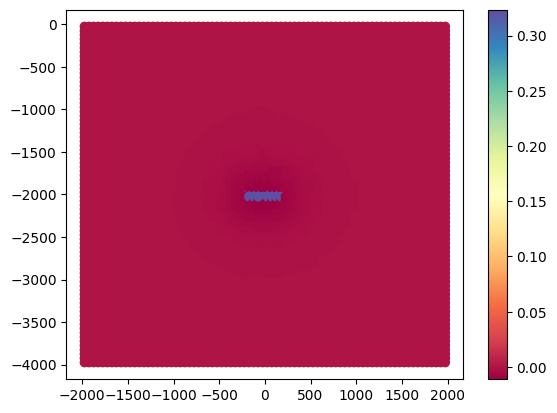

In [16]:
plt.scatter(FaultCenter[:,1], FaultCenter[:,2], c = Sigma_11[-1,:], cmap = "Spectral" )
plt.colorbar()

In [17]:
S11 = np.loadtxt("../Qian/s11.txt")
S22 = np.loadtxt("../Qian/s22.txt")
S33 = np.loadtxt("../Qian/s33.txt")
S12 = np.loadtxt("../Qian/s12.txt")
S13 = np.loadtxt("../Qian/s13.txt")
S23 = np.loadtxt("../Qian/s23.txt")

ux = np.loadtxt("../Qian/ux.txt")
uy = np.loadtxt("../Qian/uy.txt")
uz = np.loadtxt("../Qian/uz.txt")

S11_contact = np.loadtxt("../Qian/s11_contact.txt")

for data_comsol in [S11, S22, S33, S12, S13, S23, ux, uy, uz, S11_contact]:
    data_comsol[:,2] -= 5000

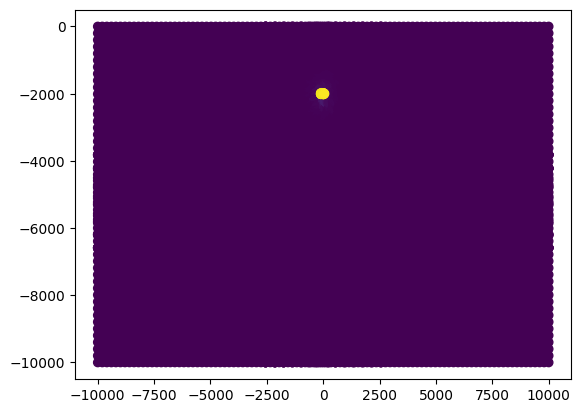

In [18]:
plt.scatter( S11_contact[:,1], S11_contact[:,2], c = S11_contact[:,3] )

In [19]:
from scipy.interpolate import RBFInterpolator
from scipy.interpolate import LinearNDInterpolator

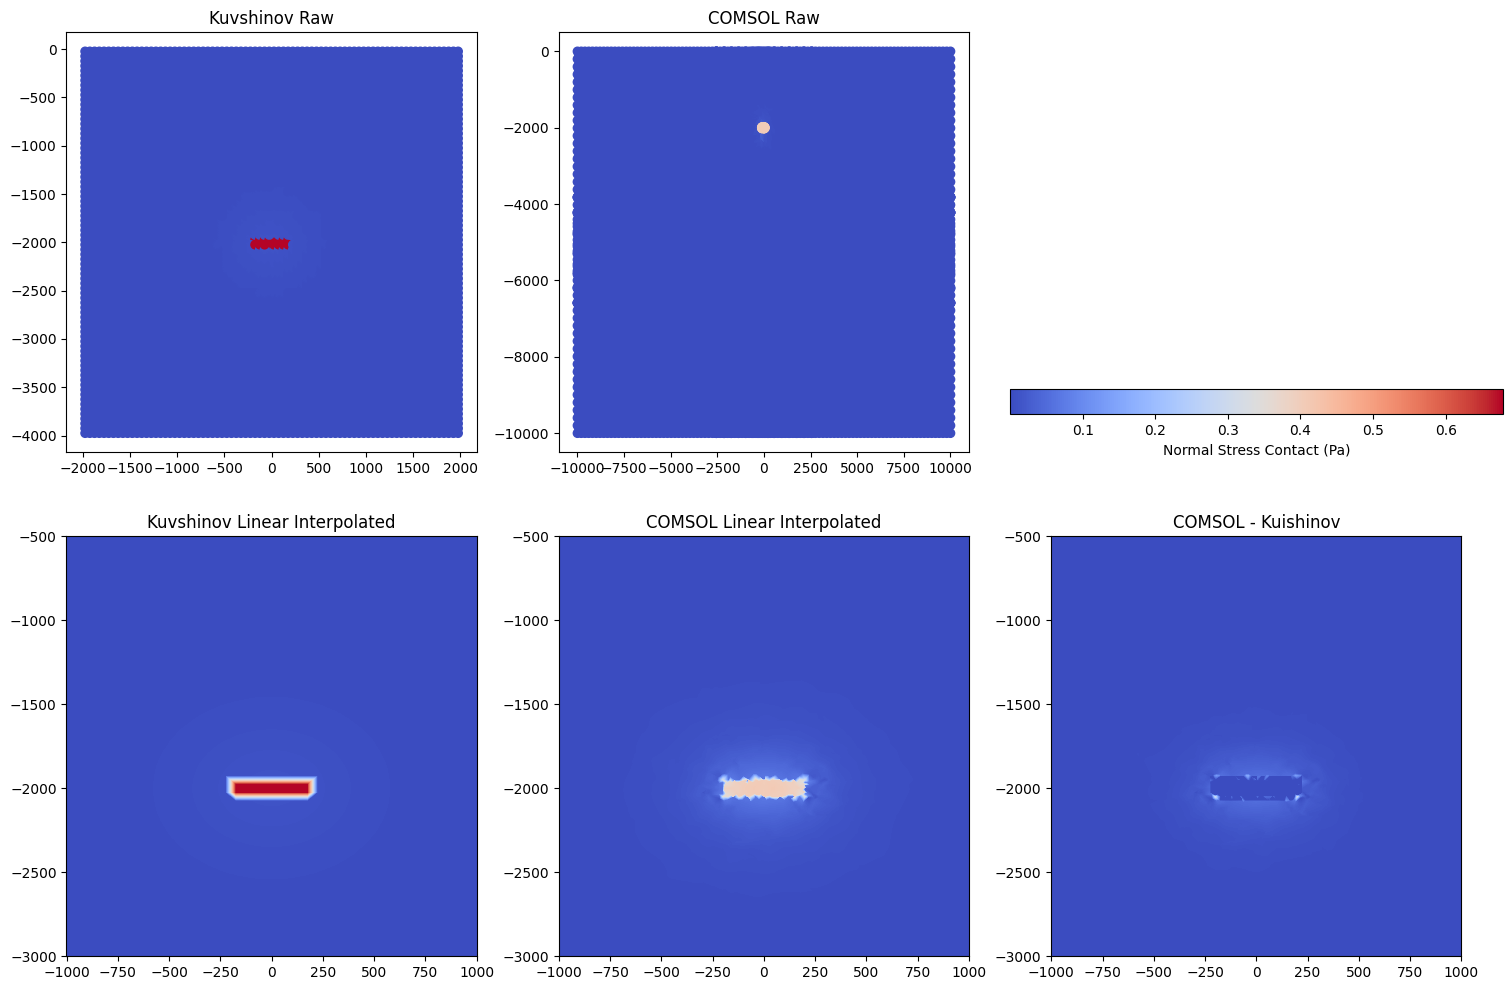

In [23]:
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
CMap = "coolwarm" # "coolwarm" "Spectral"

Field = "Normal Stress Contact (Pa)"
Field1 = Sigma_Normal[-1,:].copy()
YZField2 = S11_contact.copy()

sign_for_1 = - 1
Field1 *= sign_for_1
# -1 for uz, because the positive Z direction is opposite to each other
# -1 for s11, s22, s12 because compression positive from Kuvshinov and extension positive fomr COMSOL
#  

vmin = np.min(Field1)
vmax = np.max(Field1)

ax[0,0].scatter(FaultCenter[:,1], FaultCenter[:,2], c =  Field1, cmap = CMap, vmin=vmin, vmax = vmax)
ax[0,0].set_title("Kuvshinov Raw")
ax[0,1].scatter( YZField2[:,1], YZField2[:,2], c = YZField2[:,3], cmap = CMap,vmin=vmin, vmax = vmax )
ax[0,1].set_title("COMSOL Raw")

Y_mesh, Z_mesh = np.meshgrid(np.arange(-1000, 1000 + 1 ,1), np.arange(-3000, -500 + 1 ,1))
interp = LinearNDInterpolator(list(zip(FaultCenter[:,1], FaultCenter[:,2])), Field1)
Value_mesh = interp(Y_mesh, Z_mesh) # [:,:,0]
interp2 = LinearNDInterpolator(list(zip(YZField2[:,1], YZField2[:,2])), YZField2[:,3])
Value_mesh2 = interp2(Y_mesh, Z_mesh)


ax[1,0].pcolormesh(Y_mesh, Z_mesh, Value_mesh, cmap = CMap, vmin=vmin, vmax = vmax)
ax[1,0].set_title("Kuvshinov Linear Interpolated")
ax[1,1].pcolormesh(Y_mesh, Z_mesh, Value_mesh2, cmap = CMap, vmin=vmin, vmax = vmax)
ax[1,1].set_title("COMSOL Linear Interpolated")

ax[1,2].pcolormesh(Y_mesh, Z_mesh, Value_mesh2 - Value_mesh, cmap = CMap, vmin=vmin, vmax = vmax)
ax[1,2].set_title("COMSOL - Kuishinov")

ax[0,2].set_visible(False)
sm = plt.cm.ScalarMappable( cmap = CMap, 
                        norm=plt.Normalize(vmin = vmin,vmax = vmax) )
cbar = fig.colorbar(sm, ax = ax[0, 2], 
                    # sorientation='vertical' )
                    location="bottom", shrink = 1.2, pad=0.5, aspect = 20 )
cbar.set_label(f"{Field}")

#c bar = fig.colorbar(ax[1,2], cax = ax[0,2])


In [24]:
print( np.max(S11_contact[:,3]), np.min(S11_contact[:,3]) ) 

0.4102583169690516 -4.815824514434925e-06


In [25]:
print( np.max(Field1), np.min(Field1) )

0.6783425078083735 3.835274412508638e-05
